## OpenCV中的卷积操作

In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread("./fig/Jennie.png")

In [3]:
# kernel 必须是float型
# kernel = np.ones((5, 5), np.float32) / 25

# 其他卷积核
kernel = np.array([[-1,-1,-1], [-1, 8, -1], [-1,-1,-1]])

# 卷积操作
dst = cv2.filter2D(img, -1, kernel)

In [ ]:
cv2.imshow('img', np.hstack((img, dst)))
cv2.waitKey(0)
cv2.destroyAllWindows()

## 方盒滤波

In [ ]:
dst = cv2.boxFilter(img, -1, (5, 5), normalize=True)

cv2.imshow('img', np.hstack((img, dst)))
cv2.waitKey(0)
cv2.destroyAllWindows()

## 均值滤波

In [ ]:
dst = cv2.blur(img, (5, 5))

cv2.imshow('img', np.hstack((img, dst)))
cv2.waitKey(0)
cv2.destroyAllWindows()

## 高斯滤波

<font size=5>$$f(x,y) = \frac{1}{2\pi\sigma_x\sigma_y}e^{-\frac{1}{2}\left[\frac{(x-\mu_x)^2}{\sigma_x^2}+\frac{(y-\mu_y)^2}{\sigma_y^2}\right]}$$</font>

In [2]:
img = cv2.imread("./fig/lenna.png")

In [3]:
# 指定sigma
# dst = cv2.GaussianBlur(img, (5, 5), sigmaX=100)

# 不指定sigma
dst = cv2.GaussianBlur(img, (5, 5), sigmaX=0)

In [ ]:
cv2.imshow('img', np.hstack((img, dst)))
cv2.waitKey(0)
cv2.destroyAllWindows()

## 中值滤波

In [2]:
img = cv2.imread("./fig/papper.png")

In [ ]:
# 中值滤波
dst = cv2.medianBlur(img, 5)

cv2.imshow('img', np.hstack((img, dst)))

cv2.waitKey(0)
cv2.destroyAllWindows()

## 双边滤波

In [2]:
img = cv2.imread('./fig/Jennie.png')

In [ ]:
dst = cv2.bilateralFilter(img, 7, sigmaColor=20, sigmaSpace=50)

cv2.imshow('img', np.hstack((img, dst)))

cv2.waitKey(0)
cv2.destroyAllWindows()

## Sobel算子

In [2]:
img = cv2.imread('./fig/sudoku.jpeg')

In [ ]:
# 注意sobel算子要分别计算x, y轴梯度
# 计算x轴方向的梯度
dx = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=3)

# 计算y轴方向的梯度
dy = cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1, ksize=3)

# 使用sobel算子，别忘记把x, y的梯度合并在一起
dst = cv2.add(dx, dy)

# cv2.imshow('img', np.hstack((img, dx, dy)))
cv2.imshow('img', np.hstack((img, dx, dy, dst)))

cv2.waitKey(0)
cv2.destroyAllWindows()

## Scharr算子

In [2]:
img = cv2.imread('./fig/lenna.png')

In [3]:
dx = cv2.Scharr(img, cv2.CV_64F, dx=1, dy=0)
dy = cv2.Scharr(img, cv2.CV_64F, dx=0, dy=1)
dst = cv2.addWeighted(dx, 0.6, dy, 0.4, gamma=0)

In [4]:
cv2.imshow('img', np.hstack((dx, dy, dst)))

cv2.waitKey(0)
cv2.destroyAllWindows()

## 拉普拉斯算子

In [2]:
img = cv2.imread('./fig/sudoku.jpeg')

In [3]:
dst = cv2.Laplacian(img, -1, ksize=3)

In [ ]:
cv2.imshow('img', np.hstack((img, dst)))

cv2.waitKey(0)
cv2.destroyAllWindows()

## Canny边缘检测

In [3]:
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('./fig/lenna.png')

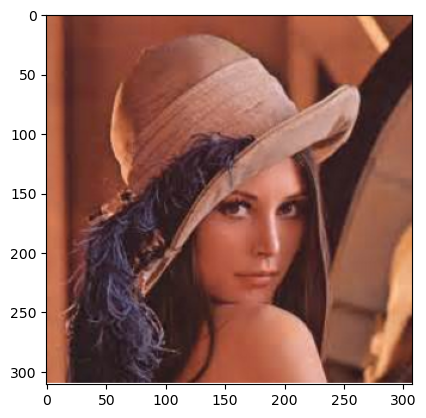

In [5]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [6]:
lenna1 = cv2.Canny(img_rgb, 100, 200)
lenna2 = cv2.Canny(img_rgb, 64, 128)

In [11]:
cv2.imshow('img', np.hstack((lenna1, lenna2)))

cv2.waitKey(0)
cv2.destroyAllWindows()

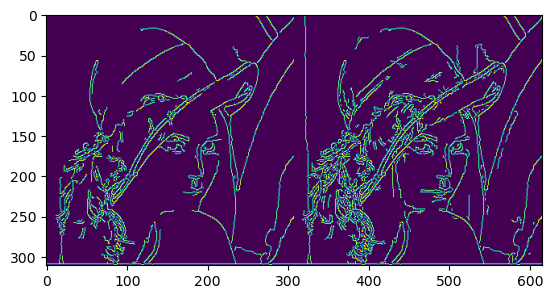

In [7]:
plt.imshow(np.hstack((lenna1, lenna2)))

In [1]:
import numpy as np

In [2]:
num_x = 1000
num_t = 1000

num_i_train = 1000
num_f_train = 1000

x = np.linspace(-2.625, 2.5, num_x)
t = np.linspace(0, 0.2, num_t)

x_grid, t_grid = np.meshgrid(x, t)

In [6]:
x_grid.shape, t_grid.shape

((1000, 1000), (1000, 1000))

In [16]:
T = t_grid.flatten()[:, None]
X = x_grid.flatten()[:, None]

In [18]:
id_ic = np.random.choice(num_x, num_i_train, replace=False)
id_f = np.random.choice(num_x*num_t, num_f_train, replace=False)

In [22]:
x_ic = x_grid[id_ic, 0][:, None]
t_ic = t_grid[id_ic, 0][:, None]

In [26]:
x_ic_train = np.hstack((x_ic, t_ic))

In [34]:
x_ic_train[0]

array([-2.625     ,  0.18258258])